<h1><center>Guide Notebook for the 380CT Assignment on TSP</center></h1>

_Kamal Bentahar_

[https://github.coventry.ac.uk/380CT-1920JANMAY/TSP-Guidance](https://github.coventry.ac.uk/380CT-1920JANMAY/TSP-Guidance)

# Notation and definitions

Let $G$ be a complete weighted graph with $n$ vertices...

- **Complete**: the graph is undirected, has no self-loops, and each node is connected to all the other vertices.
- **Weighted**: the edges have a weight (a positive integer).
- **Cycle**: a path that visits every vertex once, and goes back to the start point.
- **Total cost of the cycle**: sum of the edge weights of the cycle.

# Definition of the problem

Given $G$ as above, the versions of the TSP are defined as follows:

* **Decisional TSP (D-TSP)**:
> Given a total cost $k$, decide if $G$ is has a cycle of length $\leq k$.

    **NP-complete**, because D-TSP $\in$ NP and D-TSP $\leq_p$ HAMCYCLE.
    
    * D-TSP $\in$ NP: once a cycle is given (a certificate) we can quickly evaluate the its cost in $O(n)$ time to verify it is equal to $k$.
    * D-TSP $\leq_p$ HAMCYCLE: Reduction from HAMCYCLE (Hoos and Stutzler, p.25).

* **Search TSP**:
> Given a total cost $k$, search for a cycle of length $\leq k$ in $G$.
> (If found then return it, otherwise say that there is no such cycle.)
    
* **Optimization TSP**:
> Given $G$, find a cycle of minimal total cost.

    **NP-Hard**, because the optimization version of (decision) NP-complete problems are automatically NP-Hard. (using the same method sketched above for **Search TSP**)

The facts about the complexity classes memberships can also be found in (Garey and Johnson, 1979) and (Hoos and Stutzler, 2005).

# Testing methodology

* **Exact methods**:
    Average time for instances with increasing $n$.

* **Greedy and meta-heuristics**:
    Average "quality" as $n$ increases.


## Random instances sampling strategy

General TSP instances will be generated by creating symmetric adjacency matrices uniformly at random.

# Code

First start by importing relevant libraries.

In [0]:
from random import randint, choice
from pprint import pprint
from itertools import permutations
from math import inf as oo # Infinity (∞) is larger than any number
from math import exp, log
from time      import time
import matplotlib.pyplot as plt
import copy

## Basics

Let the set of vertices be $\{0, 1, 2,\ldots, n-1\}$.

Without loss of generality, we can consider $0$ to be the start and end point of cycles.

In [0]:
MAX_DISTANCE = 100

def random_symmetric_graph(n):
    ''' Symmetric adjacency matrix of size nxn '''
    dist_matrix = [[oo for _ in range(n)] for _ in range(n)]
    avg_dist = 0
    for i in range(n):
        for j in range(i+1,n):
            v = randint(1,MAX_DISTANCE)
            avg_dist += v
            dist_matrix[i][j] = v
            dist_matrix[j][i] = v
    return dist_matrix, avg_dist/n

def show(G):
    ''' Show adjacency matrix. Useful for debugging. '''
    n = len(G)
    r = "     "
    for i in range(n):
        r += f'{i:4}'
    r += '\n    -'+'-'*(4*n)+'\n'
    for i in range(n):
        r += f'{i:2} | '
        for j in range(n):
            r += f'{G[i][j]:4}'
        r += '\n'
    r = r.replace('inf', '  ∞')
    print(r)

def cost(G, cycle):
    ''' Calculate the cost of the given cycle '''
    c = 0
    n = len(G)
    for i in range(n):
        # a = cycle[i]
        # b = cycle[(i+1)%n]
        c += G[cycle[i]][cycle[i-1]]
    return c

### Example

In [3]:
G, avg_dist = random_symmetric_graph(5)
show(G)

        0   1   2   3   4
    ---------------------
 0 |    ∞  93  14 100  68
 1 |   93   ∞  50  35  72
 2 |   14  50   ∞  33  86
 3 |  100  35  33   ∞  30
 4 |   68  72  86  30   ∞



# Solution methods

## Exact methods -- Exhaustive search

The idea is to:
- Consider vertex $0$ as the start and end point.
- Iterate over all permutations of the vertices $\{1,2,\ldots, n-1\}$.
    -  Calculate cost of each permutation and keep track of minimum cost permutation.
- Return the cycle with minimum cost.

More formally, the pseudo-code is as follows:

**Input**: $G$.

**Output**: a cycle in $G$ of shortest cost.

1. $bestcycle\gets \emptyset$
2. $bestcost\gets \infty$
3. **for all** possible cycles $p$ in $G$ (starting and ending at $0$) **do**
4. $\quad$ $c\gets$ cost of $p$
2. $\quad$ **if** $c<bestcost$ **then**
3. $\qquad$ $bestcycle\gets p$
3. $\qquad$ $bestcost\gets c$
4. $\quad$ **end if**
5. **end for**
6. **return** $bestcycle, bestcost$

There are $(n-1)!$ possible cycles, and each computation of a cycle's cost costs $O(n)$. So this algorithm costs $$O((n-1)!\cdot n)=O(n!).$$

In [0]:
def exhaustive_search(G):
    n = len(G)    
    best_cost = oo # infinity
    best_cycle = []
    for cycle in permutations(range(1,n)): # permutations of [1,2,...,n]
        cycle=[0]+list(cycle)              # add the starting city: 0
        c = cost(G, cycle)
        if c < best_cost:
            best_cost = c
            best_cycle = cycle
    return (best_cycle, best_cost)

## Testing

In [5]:
pnts_n = []
pnts_t = []

n  = 8
t0 = t1 = 0

while t1-t0<1: # in seconds; if it takes too long then stop testing
    G, avg_dist = random_symmetric_graph(n)
    t0 = time()
    exhaustive_search(G)
    t1 = time()
    # record time
    print( f"{n}\t{t1-t0}" )
    pnts_n.append( n )
    pnts_t.append( t1-t0 )
    n += 1

8	0.010885000228881836
9	0.06538724899291992
10	0.6202874183654785
11	6.470297336578369


Let us plot this data to see it visually.

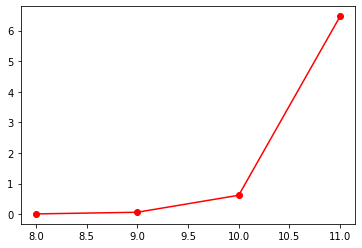

In [6]:
plt.plot(pnts_n, pnts_t, 'ro-')
plt.show()

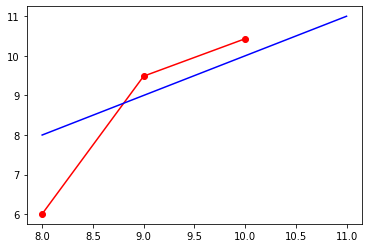

In [7]:
pnts_ratios = [pnts_t[i]/pnts_t[i-1] for i in range(1,len(pnts_n))]
plt.plot(pnts_n[:-1], pnts_ratios, 'ro-')
plt.plot(pnts_n,pnts_n,'b-') # theoretical ratios
plt.show()

### Discussion

* Exhaustive search exhibits combinatorial running time $O(n!)$:
* So it is only useful/possible when $n$ is small, up to about 13 on the current machine if it needs to finish within an hour.

# Approximation

## Greedy search

##### Nearest neigbours

In [0]:
def greedy_nearest_neighbours(G):
    H = copy.deepcopy(G) # We need the original G. We work on/modify H
    n = len(H)
    cities = list(range(n))
    cycle = [] # solution to be built
    city = 0 # Start city
    while len(cities)>0:
        # Find nearest neighbour
        city_neighbours = H[city]
        smallest_distance = min(city_neighbours)
        nearest_city = city_neighbours.index(smallest_distance)
        # Update 'cycle' and 'cities' and H then 'city'
        cycle.append(city)
        cities.remove(city)
        for i in range(n): # 'city' is not to be used again!
            H[city][i] = oo
            H[i][city] = oo
        city = nearest_city
    return (cycle, cost(G, cycle))


### Example

In [9]:
G, avg_dist = random_symmetric_graph(4)
show(G)
greedy_nearest_neighbours(G)

        0   1   2   3
    -----------------
 0 |    ∞  74  31  66
 1 |   74   ∞  62  80
 2 |   31  62   ∞  16
 3 |   66  80  16   ∞



([0, 2, 3, 1], 201)

### Test

In [10]:
MAX_REPETITIONS = 100

pnts_n = []
pnts_t = []
pnts_q = []

n = 10
t = 0

while t<10: # in seconds; if it takes too long then stop testing
    t = 0
    expected_cycle_length = (MAX_DISTANCE/2)*n # TODO: Better estimate?
    sum_of_avgs = 0

    sum_of_distances = 0
    for repetitions in range(MAX_REPETITIONS):
        G, avg_dist = random_symmetric_graph(n)
        t0 = time()
        cycle, c = greedy_nearest_neighbours(G)
        t1 = time()

        sum_of_avgs += (avg_dist/2)*n
        sum_of_distances += c
        t += t1-t0
    # record time and quality
    q = (sum_of_distances/MAX_REPETITIONS)/expected_cycle_length
    q2 = sum_of_distances/sum_of_avgs
    pnts_n.append( n )
    pnts_t.append( t )
    pnts_q.append( q )
    print( f"{n}\t{t}\t{q}\t{q2}" )
    n *= 2

10	0.0121917724609375	0.51662	0.22740157757588564
20	0.033110618591308594	0.31969	0.06667591301618354
40	0.11780118942260742	0.19644	0.01987832570339158
80	0.46164798736572266	0.12325	0.006178067571893502
160	1.7782399654388428	0.07480125	0.0018634260162092
320	7.147127628326416	0.0478925	0.0005944722382791324
640	29.211143493652344	0.034394375	0.0002131298352063139


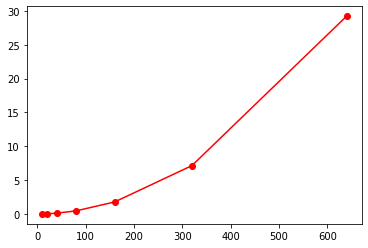

In [11]:
plt.plot(pnts_n, pnts_t, 'ro-')
plt.show()

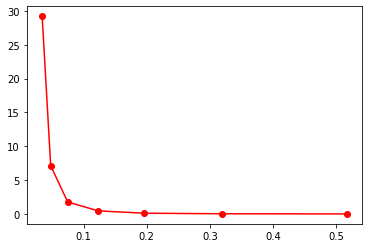

In [12]:
plt.plot(pnts_q, pnts_t, 'ro-')
plt.show()

## Metaheuristics

## 1. Iterative Improvement



*   2opt swaps for optimisation (neighbourhood exploration)
*   The first improved solution is picked on each iteration. Consequently, a subset of each cycle's neighbourhood is ignored in order to speed up the exploration process, but outputs lower quality solutions.


### Pseudocode
**Input**: $G$, $initialCycle$, a function $cost(cycle)$ that returns $cycle$ length

**Output**: local optimum path, length of the path

1. $cycle\gets initialCycle$ **or** $[1, ..., n]$
2. **while** $cycle$ is not a local optimum **do**
3. $\quad$ $improvement\gets$ first neighbour of $cycle$ such that $cost(improvement)<cost(cycle)$
4. $\quad$ $cycle\gets improvement$
5. **end while**
6. **return** $cycle, cost(cycle)$

### Big-O Analysis
Given that
*   The 2-opt swap and cost calculation take $O(n)$ time
*   At worst, finding an improvement will require exploring all the edges, which takes $O(n^{2})$ time
*   There are at most $2^{2n}$ different permutations of all the 2-opt swaps

The worst-case complexity is
 $$O(2^{n}.n^{2}.(n+n)) = O(2^{n}.n^{3})$$



In [0]:
def twoOptSwap(cycle, i, k):
    new_cycle = cycle[:i]
    new_cycle += cycle[i:k+1][::-1]
    new_cycle += cycle[k+1:]
    return new_cycle

def iterative_improvement(G, cycle, best_distance):
    H = copy.deepcopy(G) # We need the original G. We work on/modify H
    n = len(H)
    # cycle, best_distance = greedy_nearest_neighbours(H) # initial sol
    
    improved = True
    while improved:
        improved = False
        # calculate total dist for existing route 
        best_distance = cost(H, cycle)

        for i in range(0, n-2):
            improved = False
        
            for k in range(i+1, n-1):
                # new_cycle = twoOptSwap(cycle, i, k)
                new_cycle = cycle[:i] + cycle[i:k+1][::-1] + cycle[k+1:]
                new_distance = cost(H, new_cycle)
                
                if new_distance < best_distance:
                    cycle = new_cycle
                    best_distance = new_distance
                    improved = True
                    break
            
            if improved:
                break
                    
                
    return (cycle, best_distance)
    

In [14]:
G, _ = random_symmetric_graph(5)
show(G)
cycle, best_distance = greedy_nearest_neighbours(G) # initial sol

iterative_improvement(G, cycle, best_distance)

        0   1   2   3   4
    ---------------------
 0 |    ∞  20  18  77  71
 1 |   20   ∞  68  66  99
 2 |   18  68   ∞  75  22
 3 |   77  66  75   ∞  51
 4 |   71  99  22  51   ∞



([0, 2, 4, 3, 1], 177)

In [19]:
MAX_REPETITIONS = 1

pnts_n = []
pnts_t = []
pnts_q = []

n = 50
t = 0
print( f"sz\titer\tNN\tQ1" )

while t < 15: # in seconds; if it takes too long then stop testing
    t = 0; t2 = 0
    # expected_cycle_length = (MAX_DISTANCE/2)*n # TODO: Better estimate?
    sum_of_distances = 0; sum_of_inits = 0
    sum_of_avgs = 0
    for repetitions in range(MAX_REPETITIONS):
        G, avg_dist = random_symmetric_graph(n)
        ti = time()
        cycle, best_distance = greedy_nearest_neighbours(G) # initial sol
        sum_of_inits += best_distance
        t0 = time()
        cycle, c = iterative_improvement(G, cycle, best_distance)
        t1 = time()
        sum_of_distances += c
        sum_of_avgs += (avg_dist/2)*n
        t += t1-t0
        t2 += t0 - ti
    # record time and quality
    q = sum_of_inits / sum_of_avgs
    qi = sum_of_distances / sum_of_avgs
    pnts_n.append( n )
    pnts_t.append( t )
    pnts_q.append( q )
    print( f"{n}\t{t: .2f}\t{t2: .2f}\t{q: .5f}\t{qi: .5f}" )
    n += 5

sz	iter	NN	Q1
50	 0.03	 0.00	 0.01518	 0.01005
55	 0.05	 0.00	 0.00866	 0.00700
60	 0.06	 0.00	 0.00859	 0.00707
65	 0.09	 0.00	 0.00912	 0.00576
70	 0.11	 0.00	 0.00723	 0.00501
75	 0.22	 0.00	 0.00868	 0.00574
80	 0.12	 0.00	 0.00684	 0.00463
85	 0.22	 0.01	 0.00590	 0.00337
90	 0.22	 0.01	 0.00462	 0.00328
95	 0.19	 0.01	 0.00511	 0.00309
100	 0.40	 0.01	 0.00491	 0.00323
105	 0.69	 0.01	 0.00370	 0.00252
110	 0.57	 0.01	 0.00299	 0.00228
115	 0.68	 0.01	 0.00323	 0.00206
120	 0.78	 0.01	 0.00295	 0.00199
125	 0.82	 0.01	 0.00329	 0.00215
130	 0.82	 0.01	 0.00245	 0.00173
135	 1.22	 0.01	 0.00244	 0.00171
140	 1.66	 0.01	 0.00217	 0.00157
145	 1.93	 0.01	 0.00227	 0.00141
150	 1.22	 0.02	 0.00204	 0.00138
155	 0.90	 0.02	 0.00182	 0.00135
160	 1.38	 0.02	 0.00204	 0.00135
165	 1.66	 0.02	 0.00198	 0.00134
170	 2.65	 0.02	 0.00187	 0.00123
175	 3.28	 0.02	 0.00166	 0.00114
180	 3.20	 0.02	 0.00140	 0.00101
185	 3.10	 0.02	 0.00154	 0.00092
190	 1.92	 0.02	 0.00140	 0.00096
195	 3.79	

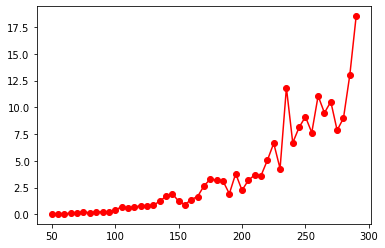

In [20]:
plt.plot(pnts_n, pnts_t, 'ro-')
plt.show()

## 2. Simulated Annealing

## Idea

## Pseudocode
**Input**: $G$, $maxTemperature$, $coolingFactor$, $K$

**Output**: a cycle in $G$, computed cycle cost

1. Determine initial candidate solution $cycle$
2. $T\gets maxTemperature$
3. **while** global optimum not reached **do**
4. $\quad$ $next \gets$ best neighbour of $cycle$ in $K$ optimisations
5. $\quad$ **if** $cost(next) < cost(cycle)$  **then**
6. $\qquad$ $cycle \gets next$
7. $\quad$ **end if**
8. $\quad$ $T \gets T$ * $coolingFactor$
9. **end while**

10. **return** $cycle, cost(cycle)$


In [0]:
# SA constants, used for tuning the algo

start_temperature = 1e2
stop_temperature = 5.
MAX_CYCLES = 10
UNCHANGED_FOR_MAX = 50

# temperature scheduling
temp_dropoff = exp(log(stop_temperature / start_temperature) / (MAX_CYCLES-1))

In [0]:
def generate_cycle(G):
    N = len(G)
    taken = [False] * N
    cycle = [0] * N

    for i in range(N-1):
        candidate_idx = randint(0, N-1)
        while taken[candidate_idx]:
            candidate_idx = randint(0, N-1)
        
        cycle[i] = candidate_idx
        taken[candidate_idx] = True

        if i == N-2:
            candidate_idx = 0
            while taken[candidate_idx]:
                candidate_idx += 1

            cycle[i+1] = candidate_idx

    return (cycle, cost(G, cycle))

In [0]:
def randomize(cycle, temperature):
    n = len(cycle) - 1
    for _ in range(int(temperature)):
        idx1 = randint(0, n)
        nxt1 = (idx1+1) % (n+1)
        idx2 = randint(0, n)
        nxt2 = (idx2+1) % (n+1)

        distance = G[cycle[idx1]][cycle[nxt1]] \
                 + G[cycle[idx2]][cycle[nxt2]] \
                 - G[cycle[idx1]][cycle[idx2]] \
                 - G[cycle[nxt1]][cycle[nxt2]]
        if distance > 0:
            # sort indices in ascending order
            if idx2 < idx1:
                idx1, idx2 = idx2, idx1
                nxt1, nxt2 = nxt2, nxt1
            cycle = cycle[:nxt1] + cycle[nxt1:idx2][::-1] + cycle[idx2:]

    return cycle

In [0]:
def sa_iteration(G, cycle, best_distance):
    # set initial temp
    temperature = start_temperature

    crt_cycle = copy.deepcopy(cycle)
    for _ in range(MAX_CYCLES):
        new_cycle = randomize(crt_cycle, temperature)
        new_distance = cost(G, new_cycle)
        
        if new_distance < best_distance:
            cycle = new_cycle
            best_distance = new_distance

        temperature *= temp_dropoff

    return (cycle, best_distance)

In [0]:
def simulated_annealing(G, cycle = None, best_distance = None):
    cycle = cycle or list(range(len(G)))
    best_distance = best_distance or cost(G, cycle)

    distance = best_distance - 1

    # iterate until a local minimum is found
    unchanged_for = 0
    while unchanged_for < UNCHANGED_FOR_MAX:
        if best_distance == distance:
            unchanged_for += 1
        else:
            distance = best_distance
            unchanged_for = 0
            cycle, best_distance = sa_iteration(G, cycle, distance)
    
    return (cycle, best_distance)

In [0]:
G, _ = random_symmetric_graph(5)
show(G)
cycle, best_distance = greedy_nearest_neighbours(G) # initial sol

simulated_annealing(G)

# Conclusion

In [0]:
MAX_REPETITIONS = 100

pnts_n = []
pnts_t = []; pnts_t_sa = []
pnts_q = []; pnts_q_sa = []

n = 50
t = 0
print( f"sz\titer\tNN\tQ1" )

while t < 10: # in seconds; if it takes too long then stop testing
    t = t_iter = t_sa = 0
    sum_of_distances = sum_of_inits = sum_of_sa = 0
    sum_of_avgs = 0
    for repetitions in range(MAX_REPETITIONS):
        G, avg_dist = random_symmetric_graph(n)
        ti = time()
        cycle, best_distance = greedy_nearest_neighbours(G) # initial sol
        sum_of_inits += best_distance
        t0 = time()
        # _, c = iterative_improvement(G, cycle, best_distance)
        t1 = time()
        _, sa = simulated_annealing(G)
        t2 = time()
        sum_of_distances += c
        sum_of_sa += sa
        sum_of_avgs += (avg_dist/2)*n
        t_sa += t2 - t1
        # t_iter += t1-t0
        t += t0 - ti
    # record time and quality
    q = sum_of_inits / sum_of_avgs
    # qi = sum_of_distances / sum_of_avgs
    q_sa = sum_of_sa / sum_of_avgs
    pnts_n.append( n )
    pnts_t.append( t )
    pnts_t_sa.append( t_sa )
    pnts_q.append( q )
    pnts_q_sa.append( q_sa )
    # print( f"{n}\t{t: .2f}\t{t_iter: .2f}\t{t_sa: .2f}\t{q: .5f}\t{qi: .5f}\t{q_sa: .5f}" )
    print( f"{n}\t{t: .2f}\t{t_sa: .2f}\t{q: .5f}\t{q_sa: .5f}" )
    n += 50

In [0]:
plt.plot(pnts_n, pnts_t, 'ro-')
plt.plot(pnts_n, pnts_t_sa, 'b-')
plt.show()
plt.plot(pnts_n, pnts_q, 'ro-')
plt.plot(pnts_n, pnts_q_sa, 'b-')
plt.show()

**Clear, brief and precise practical recommendations on
which algorithms to use when, based on your computational experiments.**

# References

* Garey, S. and Johnson, D. (1979)
**Computers and Intractability: A Guide to the Theory of NP-Completeness.**
Freeman.

* Hoos, H. and Stutzler, T. (2005)
**Stochastic Local Search: Foundations and Applications.**
Morgan Kaufmann.

* Sipser, M. (2013).
**Introduction to the theory of computation**
(3rd international ed.). Cengage Learning.